# Loading the dataset

In [ ]:
from google.colab import files

face = files.upload()

Saving face_id.zip to face_id.zip


# Import necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#Unzipping the Dataset

In [ ]:
import zipfile
import os

# Define the zip file and extraction paths
zip_file_path = "/content/face_id.zip"
extraction_path = "/content/"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Unzipping completed!")

Unzipping completed!


# Data Preprocessing

In [ ]:
data_dir = '/content/face_id'

In [ ]:
data_dir

'/content/face_id'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/face_id')

In [ ]:
list(data_dir.glob('*/*.jpeg'))

[PosixPath('/content/face_id/nazhan/nazhan (84).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (67).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (18).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (124).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (122).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (3).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (60).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (63).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (80).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (49).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (79).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (92).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (56).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (121).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (8).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (16).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (90).jpeg'),
 PosixPath('/content/face_id/nazhan/nazhan (88)

In [ ]:
len(list(data_dir.glob('*/*.jpeg')))

938

In [ ]:
himethma = list(data_dir.glob('himethma/*'))
himethma[:5]

[PosixPath('/content/face_id/himethma/himethma (67).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (139).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (111).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (80).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (122).jpeg')]

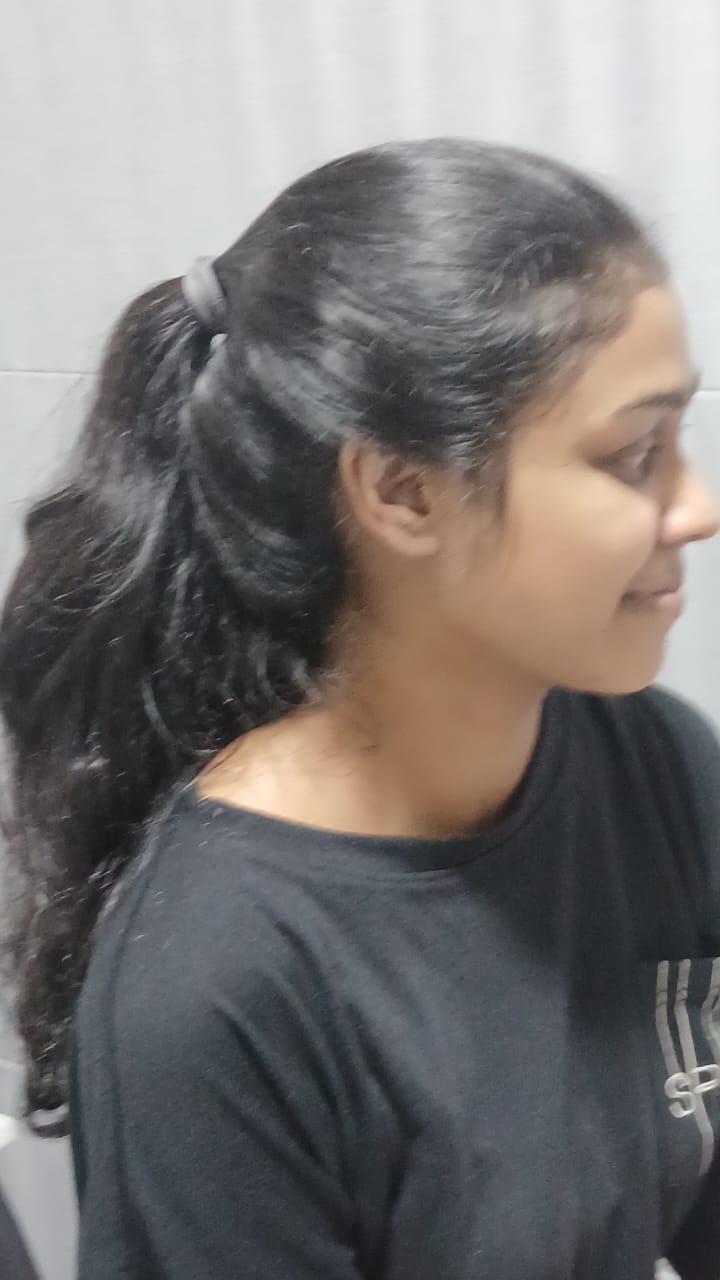

In [ ]:
PIL.Image.open(str(himethma[0]))

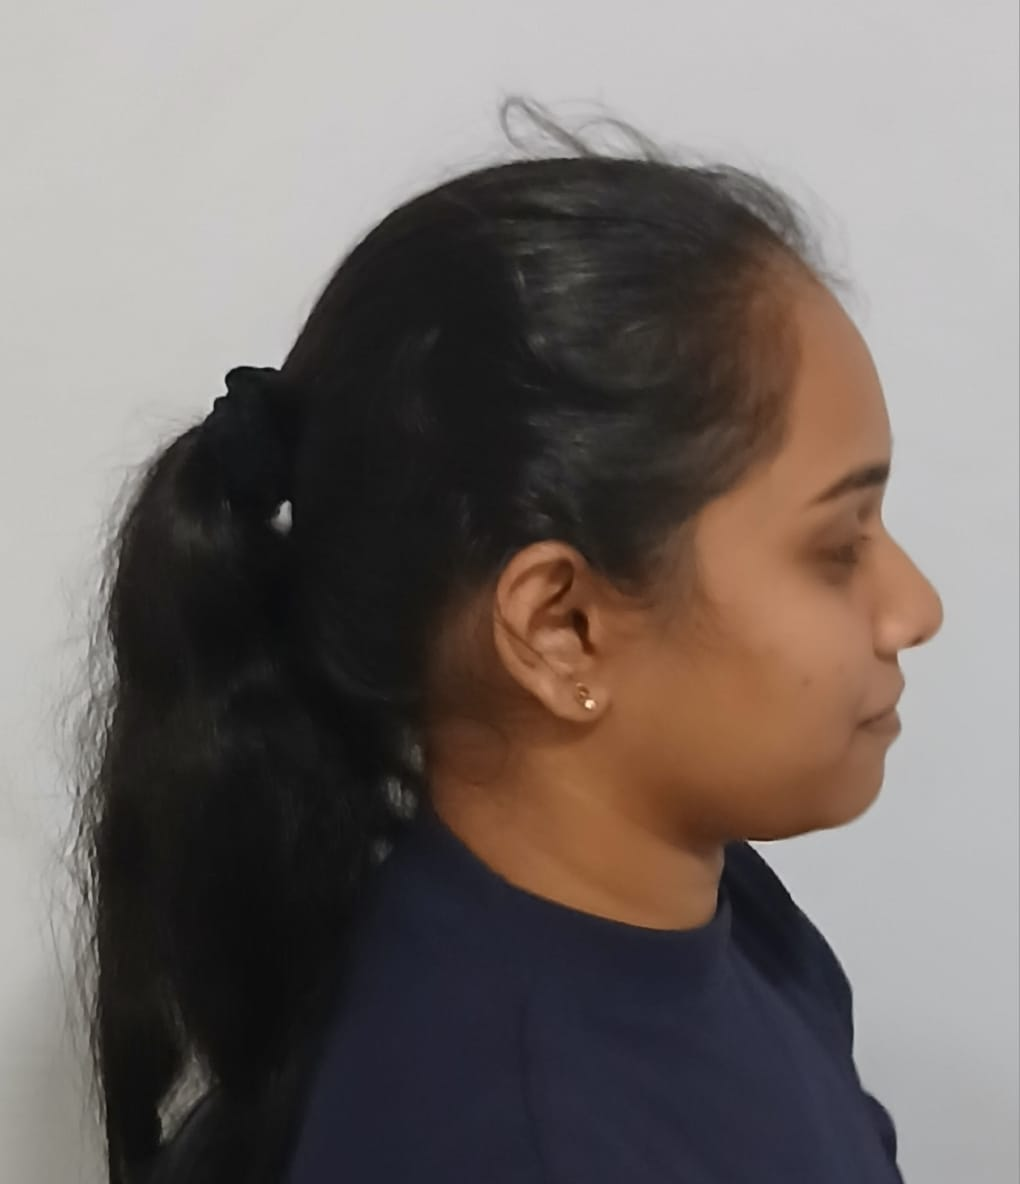

In [ ]:
kavindi = list(data_dir.glob('kavindi/*'))
PIL.Image.open(str(kavindi[0]))

In [ ]:
face_images_dict = {
    'dushara' : list(data_dir.glob('dushara/*')),
    'himethma' : list(data_dir.glob('himethma/*')),
    'kavindi' : list(data_dir.glob('kavindi/*')),
    'minhaj' : list(data_dir.glob('minhaj/*')),
    'nazhan' : list(data_dir.glob('nazhan/*')),
    'thathsara' : list(data_dir.glob('thathsara/*')),
    'umesh' : list(data_dir.glob('umesh/*')),

}

In [ ]:
face_images_dict['himethma']

[PosixPath('/content/face_id/himethma/himethma (67).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (139).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (111).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (80).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (122).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (87).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (91).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (7).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (33).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (26).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (73).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (137).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (135).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (25).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (110).jpeg'),
 PosixPath('/content/face_id/himethma/himethma (54).jpeg'),
 PosixPath('/content/face_id/himeth

In [ ]:
face_labels_dict = {
    'dushara' : 0,
    'himethma' : 1,
    'kavindi' : 2,
    'minhaj' : 3,
    'nazhan' :4,
    'thathsara' : 5,
    'umesh' : 6,
}

In [ ]:
face_images_dict['himethma'][0]

PosixPath('/content/face_id/himethma/himethma (67).jpeg')

In [ ]:
import cv2
img = cv2.imread(str(face_images_dict['himethma'][0]))
img

array([[[218, 219, 217],
        [218, 219, 217],
        [218, 219, 217],
        ...,
        [233, 231, 230],
        [232, 230, 229],
        [232, 230, 229]],

       [[218, 219, 217],
        [218, 219, 217],
        [218, 219, 217],
        ...,
        [233, 231, 230],
        [232, 230, 229],
        [232, 230, 229]],

       [[218, 219, 217],
        [218, 219, 217],
        [218, 219, 217],
        ...,
        [233, 231, 230],
        [232, 230, 229],
        [232, 230, 229]],

       ...,

       [[ 73,  65,  65],
        [ 75,  67,  67],
        [ 78,  70,  70],
        ...,
        [ 39,  37,  37],
        [ 41,  39,  39],
        [ 45,  43,  43]],

       [[ 75,  67,  67],
        [ 77,  69,  69],
        [ 79,  71,  71],
        ...,
        [ 41,  39,  39],
        [ 43,  41,  41],
        [ 48,  46,  46]],

       [[ 76,  68,  68],
        [ 78,  70,  70],
        [ 79,  71,  71],
        ...,
        [ 43,  41,  41],
        [ 45,  43,  43],
        [ 50,  48,  48]]

In [ ]:
img.shape

(1280, 720, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X,y = [],[]

for face_name, images in face_images_dict.items():
  print(face_name)
  print(len(images))

dushara
150
himethma
150
kavindi
150
minhaj
82
nazhan
125
thathsara
150
umesh
131


In [ ]:
X,y = [],[]

for face_name, images in face_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(face_labels_dict[face_name])

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

array([[[150, 168, 167],
        [150, 168, 167],
        [152, 170, 169],
        ...,
        [124, 140, 139],
        [123, 139, 138],
        [122, 138, 137]],

       [[153, 171, 170],
        [155, 173, 172],
        [154, 172, 171],
        ...,
        [124, 140, 139],
        [124, 140, 139],
        [124, 140, 139]],

       [[152, 172, 169],
        [154, 173, 170],
        [153, 172, 169],
        ...,
        [123, 142, 139],
        [123, 142, 139],
        [123, 142, 139]],

       ...,

       [[ 28,  22,  15],
        [ 32,  24,  17],
        [ 37,  28,  21],
        ...,
        [ 80,  98,  95],
        [ 89, 109, 106],
        [ 89, 112, 108]],

       [[ 44,  36,  29],
        [ 54,  46,  39],
        [ 43,  35,  28],
        ...,
        [ 82, 100,  97],
        [ 90, 110, 107],
        [ 89, 110, 107]],

       [[ 47,  36,  28],
        [ 50,  39,  31],
        [ 49,  38,  30],
        ...,
        [ 86, 104, 101],
        [ 90, 110, 108],
        [ 88, 109, 106]]], dtype=uint8)
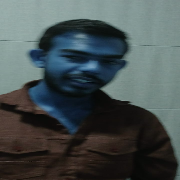

In [ ]:
X[0]

In [ ]:
X = np.array(X)
y = np.array(y)

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset: 85% for training+validation and 15% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Split the training+validation set: 70% training and 15% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=0)  # 15% / 85% ≈ 0.1765

In [ ]:
# Check the sizes of the splits
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 656
Validation set size: 141
Testing set size: 141


# Normalize the DataSet

In [ ]:
# Normalize the datasets
X_train_scaled = X_train / 255.0
X_val_scaled = X_val / 255.0
X_test_scaled = X_test / 255.0

# Verify the shapes
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_val shape: {X_val_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")

X_train shape: (656, 180, 180, 3)
X_val shape: (141, 180, 180, 3)
X_test shape: (141, 180, 180, 3)


In [ ]:
len(X_train)

656

In [ ]:
len(y_test)

141

In [ ]:
X_train_scaled[0]

array([[[0.71372549, 0.71764706, 0.73333333],
        [0.70980392, 0.71372549, 0.72941176],
        [0.68235294, 0.68627451, 0.70196078],
        ...,
        [0.77647059, 0.76078431, 0.75686275],
        [0.77647059, 0.76078431, 0.75686275],
        [0.77647059, 0.76078431, 0.75686275]],

       [[0.70980392, 0.71764706, 0.73333333],
        [0.64705882, 0.65098039, 0.66666667],
        [0.62352941, 0.62745098, 0.64313725],
        ...,
        [0.78039216, 0.76470588, 0.76078431],
        [0.78039216, 0.76470588, 0.76078431],
        [0.78039216, 0.76470588, 0.76078431]],

       [[0.63529412, 0.63921569, 0.65490196],
        [0.62745098, 0.63137255, 0.64705882],
        [0.62352941, 0.62745098, 0.64313725],
        ...,
        [0.78039216, 0.76470588, 0.76078431],
        [0.78039216, 0.76470588, 0.76078431],
        [0.78823529, 0.77254902, 0.76862745]],

       ...,

       [[0.20392157, 0.13333333, 0.43529412],
        [0.19215686, 0.11764706, 0.42352941],
        [0.18431373, 0

# Build the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

num_classes = 7
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,543 (15.22 MB)

 Trainable params: 3,989,543 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [ ]:
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3786 - loss: 1.7860
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8484 - loss: 0.4597
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9546 - loss: 0.1255
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9712 - loss: 0.1006
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9951 - loss: 0.0195
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9993 - loss: 0.0077
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.0000 - loss: 0.0037
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 1.0000 - loss: 0.0011
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 1.0000 - loss: 6.6957e-04
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 1.0000 - loss: 4.5905e-04


In [ ]:
model.evaluate(X_test_scaled,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.9741 - loss: 0.0721


[0.06479519605636597, 0.9716312289237976]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step


array([[ 1.46985495e+00,  6.56814337e+00,  2.23032951e+01,
        -4.26833725e+00, -7.14179850e+00,  1.03426790e+01,
         1.74408257e+00],
       [ 1.65894203e+01,  1.22228837e+00,  1.61817610e+00,
        -4.72684908e+00, -4.20589542e+00, -3.66059504e-02,
         6.06994677e+00],
       [ 6.75891924e+00,  1.15622721e+01,  1.23502243e+00,
        -1.22078621e+00, -1.72621708e+01, -3.63638735e+00,
         2.52563877e+01],
       [ 1.57356768e+01,  4.80449724e+00,  4.07612514e+00,
        -1.02591887e+01, -1.09900408e+01,  1.32179272e+00,
         7.52952385e+00],
       [ 2.46047306e+00,  7.13485336e+00,  2.02969494e+01,
         1.06173313e+00, -1.41535959e+01,  8.68599033e+00,
         4.23202848e+00],
       [ 4.00672865e+00, -4.65128981e-02,  2.04818106e+00,
        -6.51394510e+00,  1.62899189e+01,  3.07368493e+00,
        -4.20571899e+00],
       [ 2.33172536e+00, -6.97337329e-01, -4.34896231e+00,
         1.62671909e+01, -3.77175951e+00,  4.85583544e+00,
         4.2741365

In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([8.9567154e-10, 1.4665868e-07, 9.9999344e-01, 2.8845884e-12,
       1.6298802e-13, 6.3909820e-06, 1.1782703e-09], dtype=float32)>

In [ ]:
np.argmax(score)

2

In [ ]:
y_test[0]

2

# Data Augmentation

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define image dimensions
image_height = 180
image_width = 180

data_augmentation = keras.Sequential([
    layers.Input(shape=(180, 180, 3)),  # Define input shape here
    layers.RandomZoom(0.5),
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.2),
    layers.RandomFlip("horizontal",
                      input_shape=(image_height,
                                     image_width,
                                     3))
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


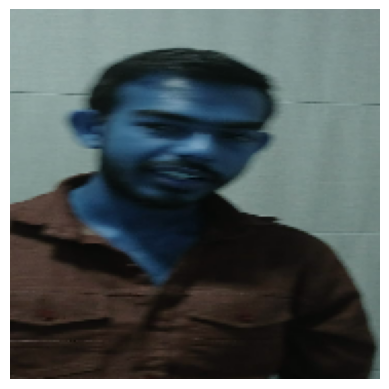

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
# Add a batch dimension to the input image using np.expand_dims
augmented_image = data_augmentation(np.expand_dims(X[0], axis=0))

In [ ]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[119.76532  , 139.67166  , 136.41602  ],
        [123.5535   , 143.3457   , 139.21164  ],
        [124.58685  , 144.57272  , 140.35983  ],
        ...,
        [ 52.36361  ,  85.143425 , 106.32762  ],
        [ 43.496525 ,  70.89432  ,  89.68525  ],
        [ 40.69191  ,  66.02958  ,  83.23514  ]],

       [[121.23164  , 140.77013  , 138.31033  ],
        [123.66233  , 142.98541  , 139.35367  ],
        [123.21773  , 143.18689  , 139.68668  ],
        ...,
        [ 62.320156 , 102.78829  , 129.9215   ],
        [ 61.288197 ,  99.11799  , 125.47938  ],
        [ 52.23452  ,  86.05039  , 109.01802  ]],

       [[122.686356 , 141.89232  , 139.27896  ],
        [123.13015  , 142.05688  , 139.16292  ],
        [122.470406 , 141.57896  , 138.70937  ],
        ...,
        [ 56.433544 ,  99.64339  , 127.282005 ],
        [ 57.212414 ,  99.05779  , 126.41665  ],
        [ 57.739006 ,  98.55056  , 125.591995 ]],

       ...,

     

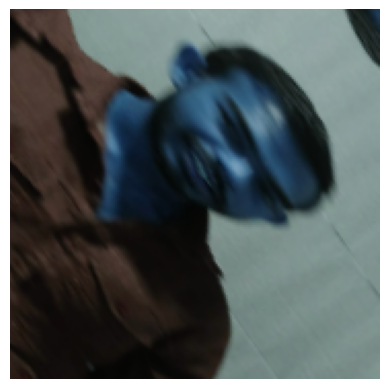

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
print(data_augmentation.input_shape)  # Expected input shape for data augmentation
print(data_augmentation.output_shape) # Output shape from data augmentation

(None, 180, 180, 3)
(None, 180, 180, 3)


# build the model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential, regularizers
# Adjusted Model
num_classes = 7
model = Sequential([
    layers.Input(shape=(180, 180, 3)),
    data_augmentation,  # Data augmentation layer for better generalization

    layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),  # Reduced dropout rate for better learning

    layers.Flatten(),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.002)),
    layers.Dropout(0.2),  # Reduced dropout rate for better learning

    layers.Dense(num_classes, activation='softmax')
])

# Compile the model with a higher learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Increased learning rate
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,543 (15.22 MB)

 Trainable params: 3,989,543 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

# Model Architecture

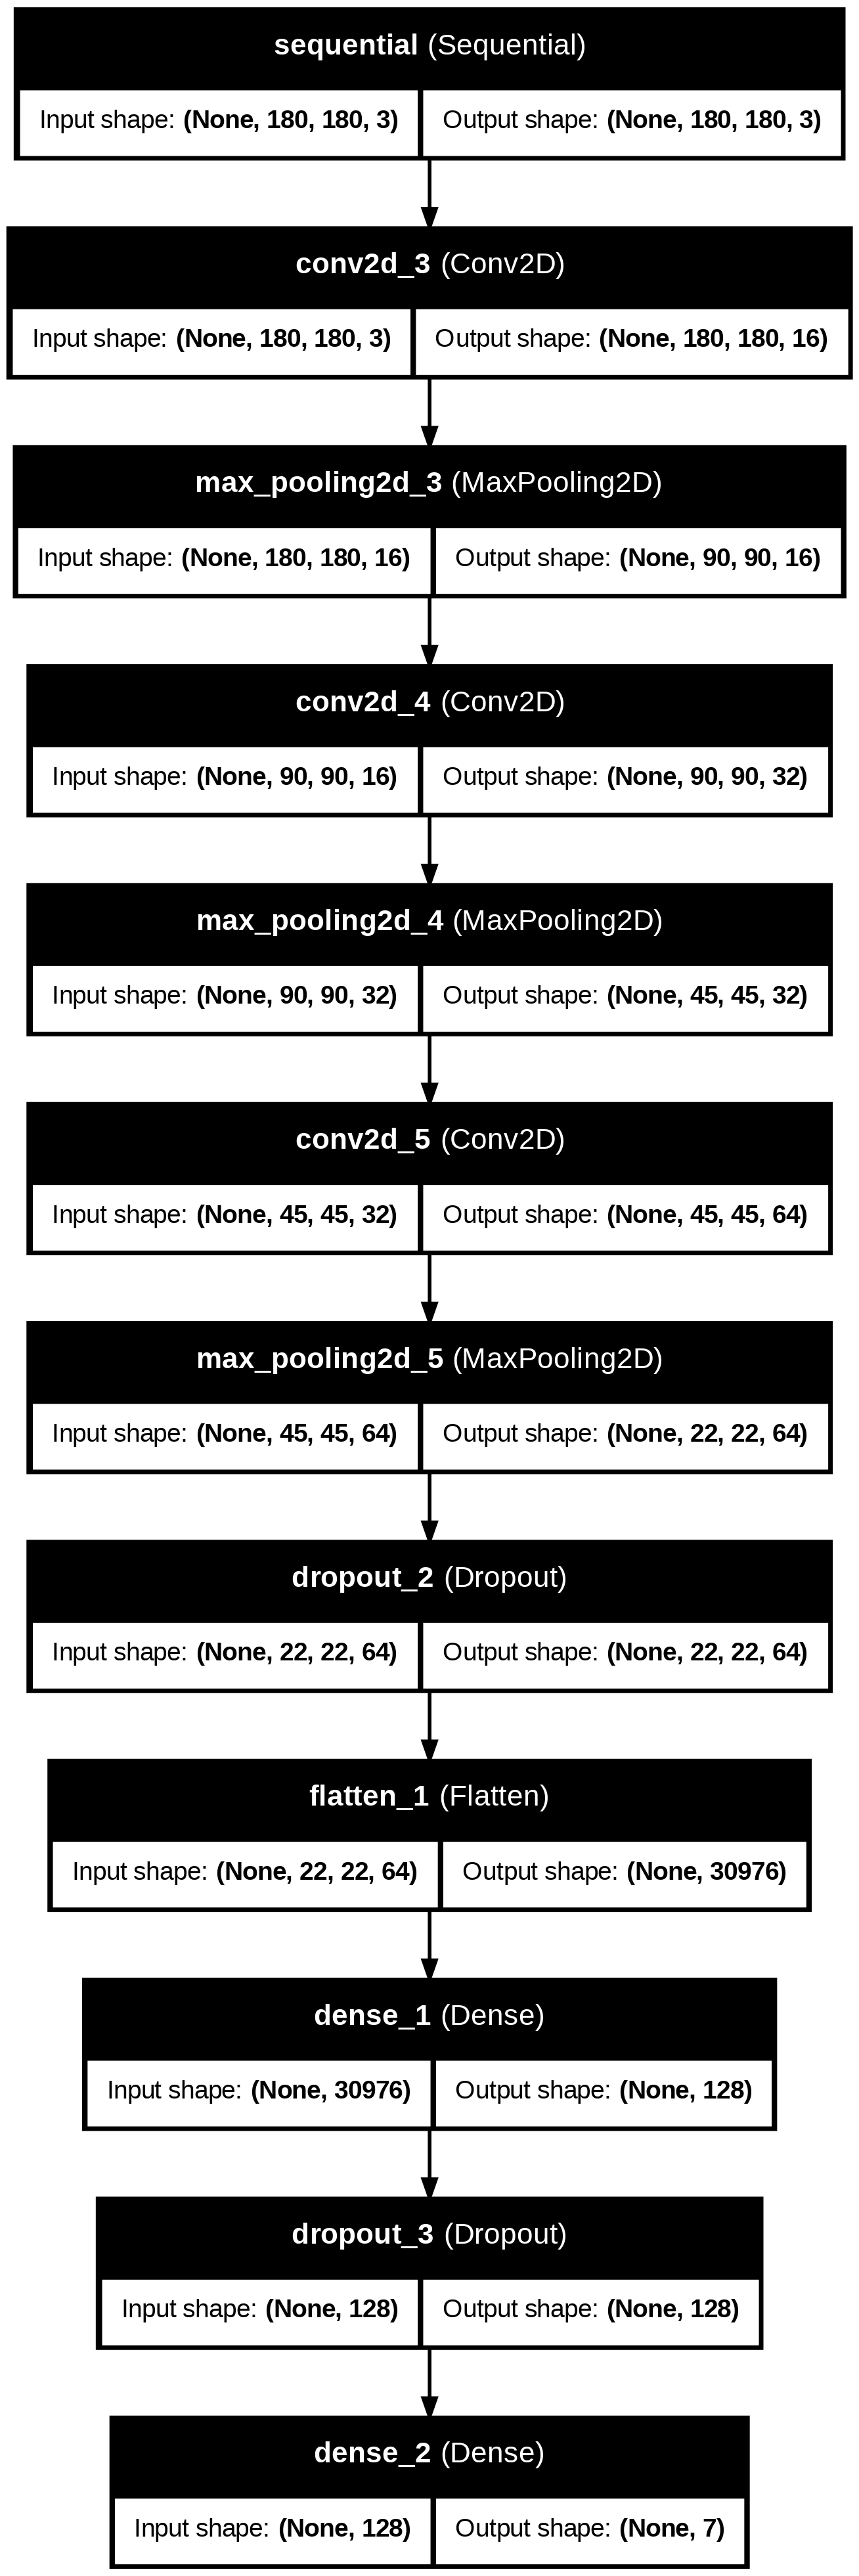

In [ ]:
from tensorflow.keras.utils import plot_model

# Save the model architecture as an image file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Train the model

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def lr_schedule(epoch, lr):
    if epoch < 50:
        return lr
    elif epoch < 75:
        return lr * 0.5
    else:
        return lr * 0.1

lr_scheduler = LearningRateScheduler(lr_schedule)

# Include lr_scheduler in the callbacks
# Train the model with a batch size
batch_size = 32  # Specify batch size
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,  # Train for more epochs with early stopping
    validation_data=(X_val_scaled, y_val),
    batch_size=batch_size,  # Use the batch size
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.1683 - loss: 3.2307 - val_accuracy: 0.2979 - val_loss: 2.2686
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3246 - loss: 2.2017 - val_accuracy: 0.4184 - val_loss: 1.8221
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4304 - loss: 1.8867 - val_accuracy: 0.5957 - val_loss: 1.6116
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4976 - loss: 1.6617 - val_accuracy: 0.6738 - val_loss: 1.4229
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5970 - loss: 1.4953 - val_accuracy: 0.7730 - val_loss: 1.2011
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6579 - loss: 1.3735 - val_accuracy: 0.7376 - val_loss: 1.1718
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7044 - loss: 1.2004 - val_accuracy: 0.7660 - val_loss: 1.1055
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7558 - loss: 1.1197 - val_accuracy: 0.8227 - v

In [ ]:
model.evaluate(X_test_scaled,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 431ms/step - accuracy: 0.9844 - loss: 0.4189


[0.3711135983467102, 0.9858155846595764]

# Loss Curve

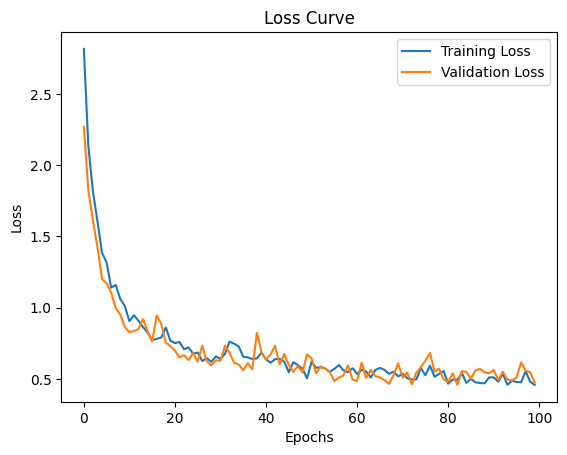

In [ ]:
# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 367ms/step


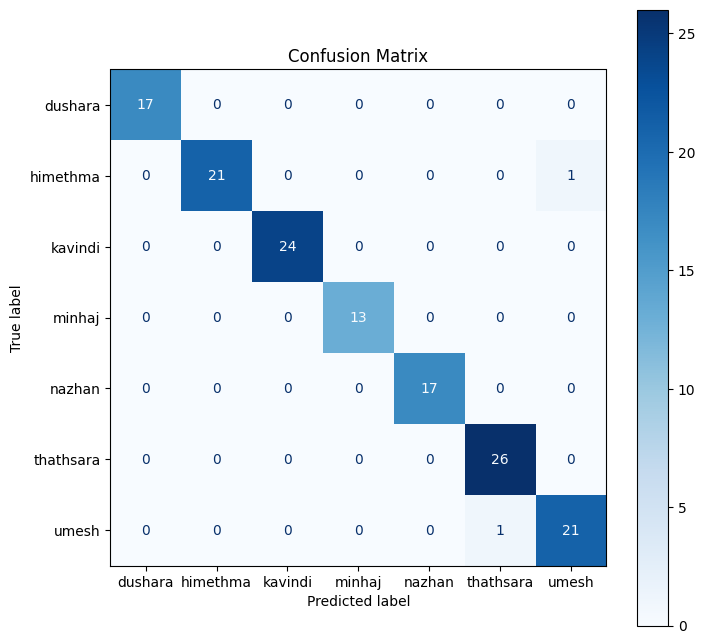

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Make predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with custom figure size
plt.figure(figsize=(8, 8))  # Adjust the figure size (width, height)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=face_labels_dict.keys())
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Plot on the current axes
plt.title('Confusion Matrix')
plt.show()

# Precision_Recall Curve

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step


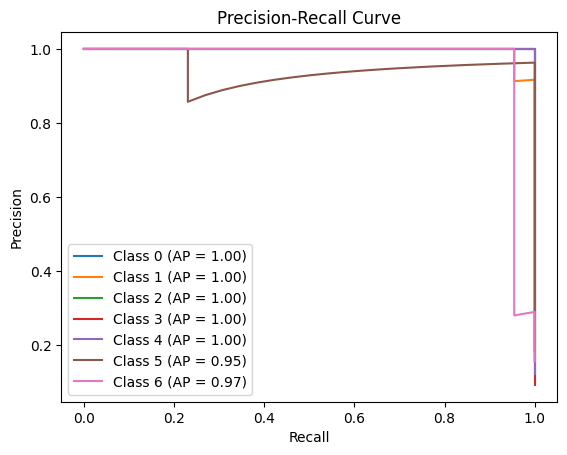

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=range(num_classes))

# Get predicted probabilities for each class
y_pred_proba = model.predict(X_test_scaled)

# Compute Precision-Recall curve for each class
precision = {}
recall = {}
average_precision = {}

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])

# Plot the PR curve for each class
plt.figure()
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label=f"Class {i} (AP = {average_precision[i]:.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ROC Curve

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step


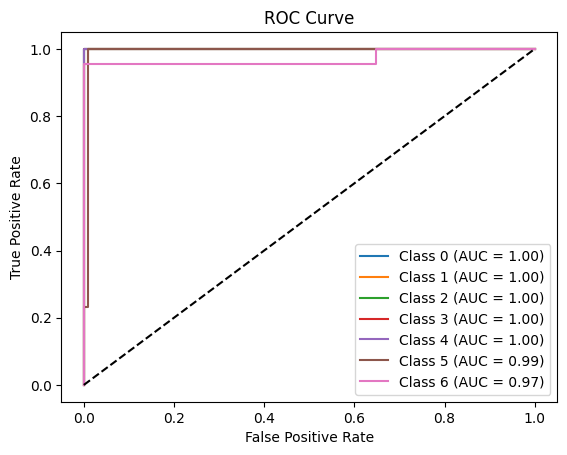

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=range(num_classes))
y_pred_proba = tf.nn.softmax(model.predict(X_test_scaled)).numpy()

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Evaluate the model

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, batch_size=32)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.9844 - loss: 0.4189
Test Loss: 0.3711135983467102
Test Accuracy: 0.9858155846595764


# Predictions of Test Set

In [ ]:
# Generate predictions on the test set
predictions = model.predict(X_test_scaled)

# If using a classification model, get the predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# Compare with the true labels
print(f"Predicted Classes: {predicted_classes}")
print(f"True Classes: {y_test}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 426ms/step
Predicted Classes: [2 0 6 0 2 4 3 0 2 6 1 4 4 2 0 4 0 6 1 5 1 5 1 0 5 2 5 5 1 6 1 1 4 2 5 6 6
 0 3 1 1 6 6 0 3 1 5 3 1 5 2 2 1 1 5 6 5 3 0 1 1 3 3 5 0 4 5 6 6 2 6 5 0 2
 5 6 5 4 4 2 0 4 6 4 2 0 5 3 4 1 2 6 6 4 2 2 0 2 5 1 1 5 5 0 2 0 6 4 3 5 6
 4 6 2 4 2 2 2 1 1 3 4 2 6 5 3 6 5 2 4 1 3 5 5 2 6 5 3 5 5 0]
True Classes: [2 0 6 0 2 4 3 0 2 6 1 4 4 2 0 4 0 6 1 5 1 5 1 0 6 2 5 5 1 6 1 1 4 2 5 6 6
 0 3 1 1 6 6 0 3 1 5 3 1 5 2 2 1 1 5 6 5 3 0 1 1 3 3 5 0 4 5 6 6 2 6 5 0 2
 5 6 5 4 4 2 0 4 6 4 2 0 5 3 4 1 2 6 6 4 2 2 0 2 5 1 1 5 5 0 2 0 6 4 3 5 6
 4 6 2 4 2 2 2 1 1 3 4 2 6 5 3 6 5 2 4 1 3 5 5 2 1 5 3 5 5 0]


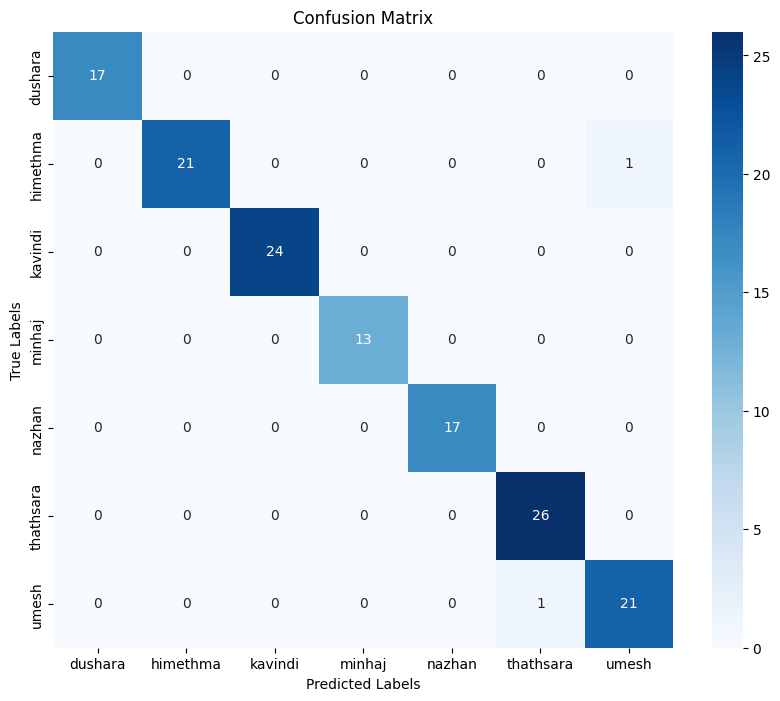

              precision    recall  f1-score   support

     dushara       1.00      1.00      1.00        17
    himethma       1.00      0.95      0.98        22
     kavindi       1.00      1.00      1.00        24
      minhaj       1.00      1.00      1.00        13
      nazhan       1.00      1.00      1.00        17
   thathsara       0.96      1.00      0.98        26
       umesh       0.95      0.95      0.95        22

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Define class_names based on your face_labels_dict
class_names = list(face_labels_dict.keys()) # Get the keys from face_labels_dict

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, predicted_classes, target_names=class_names))

#Testing

Please upload an image.


Saving Screenshot 2024-11-29 214258.png to Screenshot 2024-11-29 214258.png


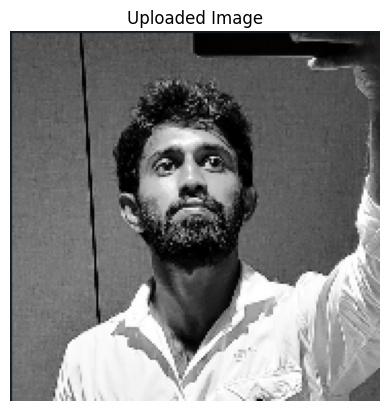

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Class: thathsara
Confidence: 1.00


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Function to upload an image
def upload_and_predict(model, class_names):
    # Step 1: Upload an image
    print("Please upload an image.")
    uploaded = files.upload()

    for file_name in uploaded.keys():
        # Step 2: Load the image
        img = image.load_img(file_name, target_size=(180, 180))  # Resize to model's input size

        # Step 3: Preprocess the image
        img_array = image.img_to_array(img)                      # Convert to array
        img_array = img_array / 255.0                            # Normalize to [0, 1] range
        img_array = np.expand_dims(img_array, axis=0)            # Add batch dimension

        # Step 4: Display the image
        plt.imshow(img)
        plt.axis("off")
        plt.title("Uploaded Image")
        plt.show()

        # Step 5: Predict using the model
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])              # Get the predicted class index
        confidence = np.max(predictions[0])                     # Get the confidence score

        # Step 6: Display the result
        print(f"Predicted Class: {class_names[predicted_class]}")
        print(f"Confidence: {confidence:.2f}")

# Define the class names (replace with your actual class names)
class_names = ["dushara", "himethma", "kavindi", "minhaj", "nazhan", "thathsara", "umesh"]  # Modify accordingly

# Use the function to upload and test an image
upload_and_predict(model, class_names)


In [ ]:
# For HDF5 file format
# model.save('my_model.h5')  # Add .h5 extension

# For TensorFlow SavedModel format (zip it first for easier download)
# 1. Save the model to a directory with .keras extension
model.save('my_model.keras')  # Add .keras extension
# 2. Zip the saved model directory
!zip -r my_model.zip my_model.keras  # Update the zip command
# 3. Download the zip file
files.download('my_model.zip')

  adding: my_model.keras (deflated 4%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>